In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
#import pydotplus

In [2]:
dummy_df = pd.read_csv(r'C:\Users\jaswanth\Downloads\learnbay\python class lernbay\datasets for practice\utkarsh_prctie_dataset\bank.csv')
temp = dummy_df.columns
temp

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [3]:
copy_df = dummy_df.copy()

In [4]:
copy_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [6]:
copy_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [7]:
copy_df.shape

(11162, 17)

# to change object into  int

In [8]:
def preprocessor(copy_df):
    res_df = copy_df.copy()
    le = preprocessing.LabelEncoder()
    res_df['job'] = le.fit_transform(res_df['job'])
    res_df['marital'] = le.fit_transform(res_df['marital'])
    res_df['education'] = le.fit_transform(res_df['education'])
    res_df['default'] = le.fit_transform(res_df['default'])
    res_df['housing'] = le.fit_transform(res_df['housing'])
    res_df['month'] = le.fit_transform(res_df['month'])
    res_df['loan'] = le.fit_transform(res_df['loan'])
    res_df['contact'] = le.fit_transform(res_df['contact'])
    res_df['day_of_week'] = le.fit_transform(res_df['day'])
    res_df['poutcome'] = le.fit_transform(res_df['poutcome'])
    res_df['deposit'] = le.fit_transform(res_df['deposit'])
    return res_df

In [9]:
encoded_df = preprocessor(copy_df)

x = encoded_df.drop(['deposit'],axis =1).values
y = encoded_df['deposit'].values
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          11162 non-null  int64
 1   job          11162 non-null  int32
 2   marital      11162 non-null  int32
 3   education    11162 non-null  int32
 4   default      11162 non-null  int32
 5   balance      11162 non-null  int64
 6   housing      11162 non-null  int32
 7   loan         11162 non-null  int32
 8   contact      11162 non-null  int32
 9   day          11162 non-null  int64
 10  month        11162 non-null  int32
 11  duration     11162 non-null  int64
 12  campaign     11162 non-null  int64
 13  pdays        11162 non-null  int64
 14  previous     11162 non-null  int64
 15  poutcome     11162 non-null  int32
 16  deposit      11162 non-null  int32
 17  day_of_week  11162 non-null  int64
dtypes: int32(10), int64(8)
memory usage: 1.1 MB


In [10]:
print(type(x))
print(x.shape)
print(y.shape)

<class 'numpy.ndarray'>
(11162, 17)
(11162,)


In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2)

In [28]:
# Decision tree with depth = 8
model_dt_8 = DecisionTreeClassifier(random_state=101, max_depth=12, criterion = "entropy", min_samples_split=12,
    min_samples_leaf=14,)
model_dt_8.fit(x_train, y_train)
model_dt_8_score_train = model_dt_8.score(x_train, y_train)
print("Training score: ",model_dt_8_score_train)
model_dt_8_score_test = model_dt_8.score(x_test, y_test)
print("Testing score: ",model_dt_8_score_test)

Training score:  0.8644865046477769
Testing score:  0.8369905956112853


In [29]:
pred=model_dt_8.predict(x_test)
print(pred.shape)
print(pred.size)
print(type(pred))
print(type(x_test))
print(type(y_test))

(2233,)
2233
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [30]:
df_pred_test=pd.DataFrame()
df_pred_test['predictions']=pred
df_pred_test['y_tes_actual']=y_test

In [31]:
size_of_ones=df_pred_test[(df_pred_test['predictions']==1) & (df_pred_test['y_tes_actual']==1)]
size_of_ones.head(10)

,predictions,y_tes_actual
1,1,1
3,1,1
4,1,1
8,1,1
9,1,1
12,1,1
13,1,1
18,1,1
19,1,1
21,1,1


In [32]:
size_of_ones.shape

(881, 2)

In [33]:
size_of_zeros=df_pred_test[(df_pred_test['predictions']==0) & (df_pred_test['y_tes_actual']==0)]
size_of_zeros.head(10)

,predictions,y_tes_actual
5,0,0
6,0,0
10,0,0
15,0,0
16,0,0
17,0,0
20,0,0
23,0,0
26,0,0
28,0,0


In [34]:
size_of_zeros.shape

(988, 2)

In [35]:
fpr_dt, tpr_dt, _ = roc_curve(y_test,pred)
roc_auc_dt = auc(fpr_dt, tpr_dt)

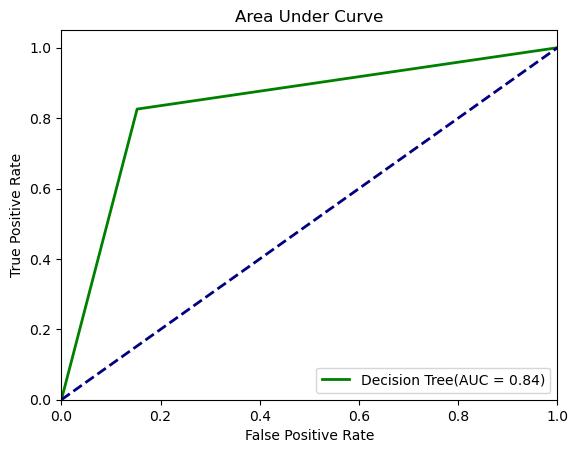

In [36]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [21]:
print (confusion_matrix(y_test,pred))

[[973 193]
 [202 865]]


In [37]:
accuracy_score(y_test, pred)

0.8369905956112853

In [41]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model_dt_8, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model_dt_8, labels=[0, 1])
    classes=["Success", "Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

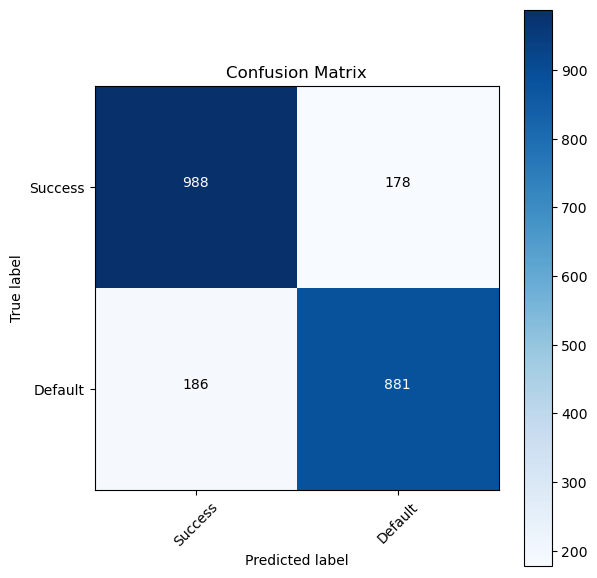

In [42]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(pred, normalize=False)
plt.show()